In [1]:
import numpy as np
import scipy.stats as stats

In [24]:
mu_0 = 35  
sigma = 5  
n = 40 
sample_mean = 33  

z = (sample_mean - mu_0) / (sigma / np.sqrt(n))
print(f"Z-test statistic: {z:.2f}")

critical_value = stats.norm.ppf(0.05)
print(f"Critical value: {critical_value:.2f}")

p_value = stats.norm.cdf(z)
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The training program has significantly decreased the assembly time.")
else:
    print("Fail to reject the null hypothesis: No significant decrease in assembly time.")


Z-test statistic: -2.53
Critical value: -1.64
P-value: 0.0057
Reject the null hypothesis: The training program has significantly decreased the assembly time.


In [26]:
mu_0_grad = 25  
n_grad = 15  
sample_mean_grad = 27 
s_grad = 4.5  

t = (sample_mean_grad - mu_0_grad) / (s_grad / np.sqrt(n_grad))
print(f"T-test statistic: {t:.2f}")

critical_value_grad = stats.t.ppf(0.95, df=n_grad - 1)
print(f"Critical value: {critical_value_grad:.2f}")

p_value_grad = 1 - stats.t.cdf(t, df=n_grad - 1)
print(f"P-value: {p_value_grad:.4f}")

if p_value_grad < 0.05:
    print("Reject the null hypothesis: Graduate students study more than 25 hours per week.")
else:
    print("Fail to reject the null hypothesis: No significant increase in study hours.")


T-test statistic: 1.72
Critical value: 1.76
P-value: 0.0536
Fail to reject the null hypothesis: No significant increase in study hours.


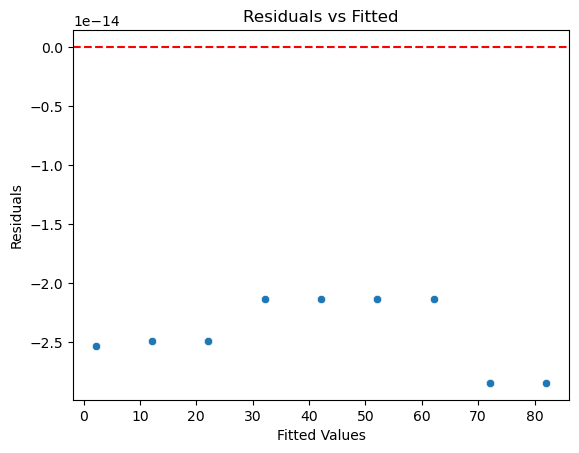

In [28]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Hours_of_Study': [5, 5, 7, 3, 0, 5, 2, 7, 4, 2, 1, 6, 8, 5, 7],
    'Score': [52.1221, 52.1221, 72.1221, 32.1221, 2.1221, 52.1221,
              22.1221, 72.1221, 42.1221, 22.1221, 12.1221, 62.1221,
              82.1221, 52.1221, 72.1221]
}

df = pd.DataFrame(data)

X = df['Hours_of_Study']
Y = df['Score']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

residuals = model.resid
fitted = model.fittedvalues

sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [30]:
influence = model.get_influence()
summary_frame = influence.summary_frame()
outliers = summary_frame[summary_frame['student_resid'].abs() > 2]
print("Outliers:\n", outliers)

Outliers:
     dfb_const  dfb_Hours_of_Study   cooks_d  standard_resid  hat_diag  \
0    4.285681           -1.542797  0.026899       -0.844472  0.070147   
1    4.285681           -1.542797  0.026899       -0.844472  0.070147   
2    2.503697            0.000000  0.117117       -1.174346  0.145188   
6    6.033141           -1.351381  0.086323       -1.025110  0.141109   
7    2.148454            0.000000  0.117117       -1.174346  0.145188   
9    8.995928           -2.108747  0.086323       -1.025110  0.141109   
10   3.794408            1.529857  0.155986       -1.071387  0.213703   
11   4.417910            1.649301  0.038670       -0.856194  0.095432   
12   3.244487           -2.043963  0.212252       -1.228912  0.219413   
13   6.832967           -3.624955  0.026899       -0.844472  0.070147   
14   3.554459            0.000000  0.117117       -1.174346  0.145188   

    dffits_internal  student_resid    dffits  
0         -0.231944      -2.123651 -0.583284  
1         -0.23194

In [32]:
from scipy.optimize import linprog

c = [-1, -1, -1] 

A = [
    [2, 1, 3],  # Machine X
    [4, 3, 2]   # Machine Y
]

b = [100, 85]

x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds], method='highs')

print("Optimal production quantities:", result.x)
print("Maximum production output:", -result.fun)  

Optimal production quantities: [ 0.          7.85714286 30.71428571]
Maximum production output: 38.57142857142857


In [34]:
if result.success:
    print("Status:", result.message)
    if result.x[0] == 0:
        print("Machine X is not the limiting factor.")
    else:
        print("Machine X is the limiting factor.")

    if result.x[1] == 0:
        print("Machine Y is not the limiting factor.")
    else:
        print("Machine Y is the limiting factor.")

Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Machine X is not the limiting factor.
Machine Y is the limiting factor.
